In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore")

In [2]:
models = [
    "aya-23-8b",
    "granite-3.3-8b-instruct",
    "internlm3-8b-instruct",
    "meta-llama-3.1-8B-instruct",
    "ministral-8b-instruct-2410",
    "qwen-3-8b-instruct"
]

# BFI

## Reliability

In [3]:
all_models = pd.DataFrame(columns=["model", "trait", "cronbach_alpha", "glb", "omega"])

In [4]:
for model in models:
    df = pd.read_json(f"./persona_results/{model}/results/reliability_stats.json")
    bfi = df["BFI"]
    bfi = bfi.reset_index()
    bfi = bfi[bfi["BFI"].isna() == False]
    bfi = pd.concat((bfi, bfi["BFI"].apply(pd.Series)), axis=1)
    bfi = bfi.drop(columns=["BFI"])
    bfi.columns = ["trait", "Cronbach's Alpha", "GLB", "Omega"]
    bfi["model"] = model
    
    all_models = pd.concat((all_models, bfi), ignore_index=True)

In [5]:
all_models = all_models.melt(id_vars=["model", "trait"], value_vars=["Cronbach's Alpha", "GLB", "Omega"], var_name="metric", value_name="value")

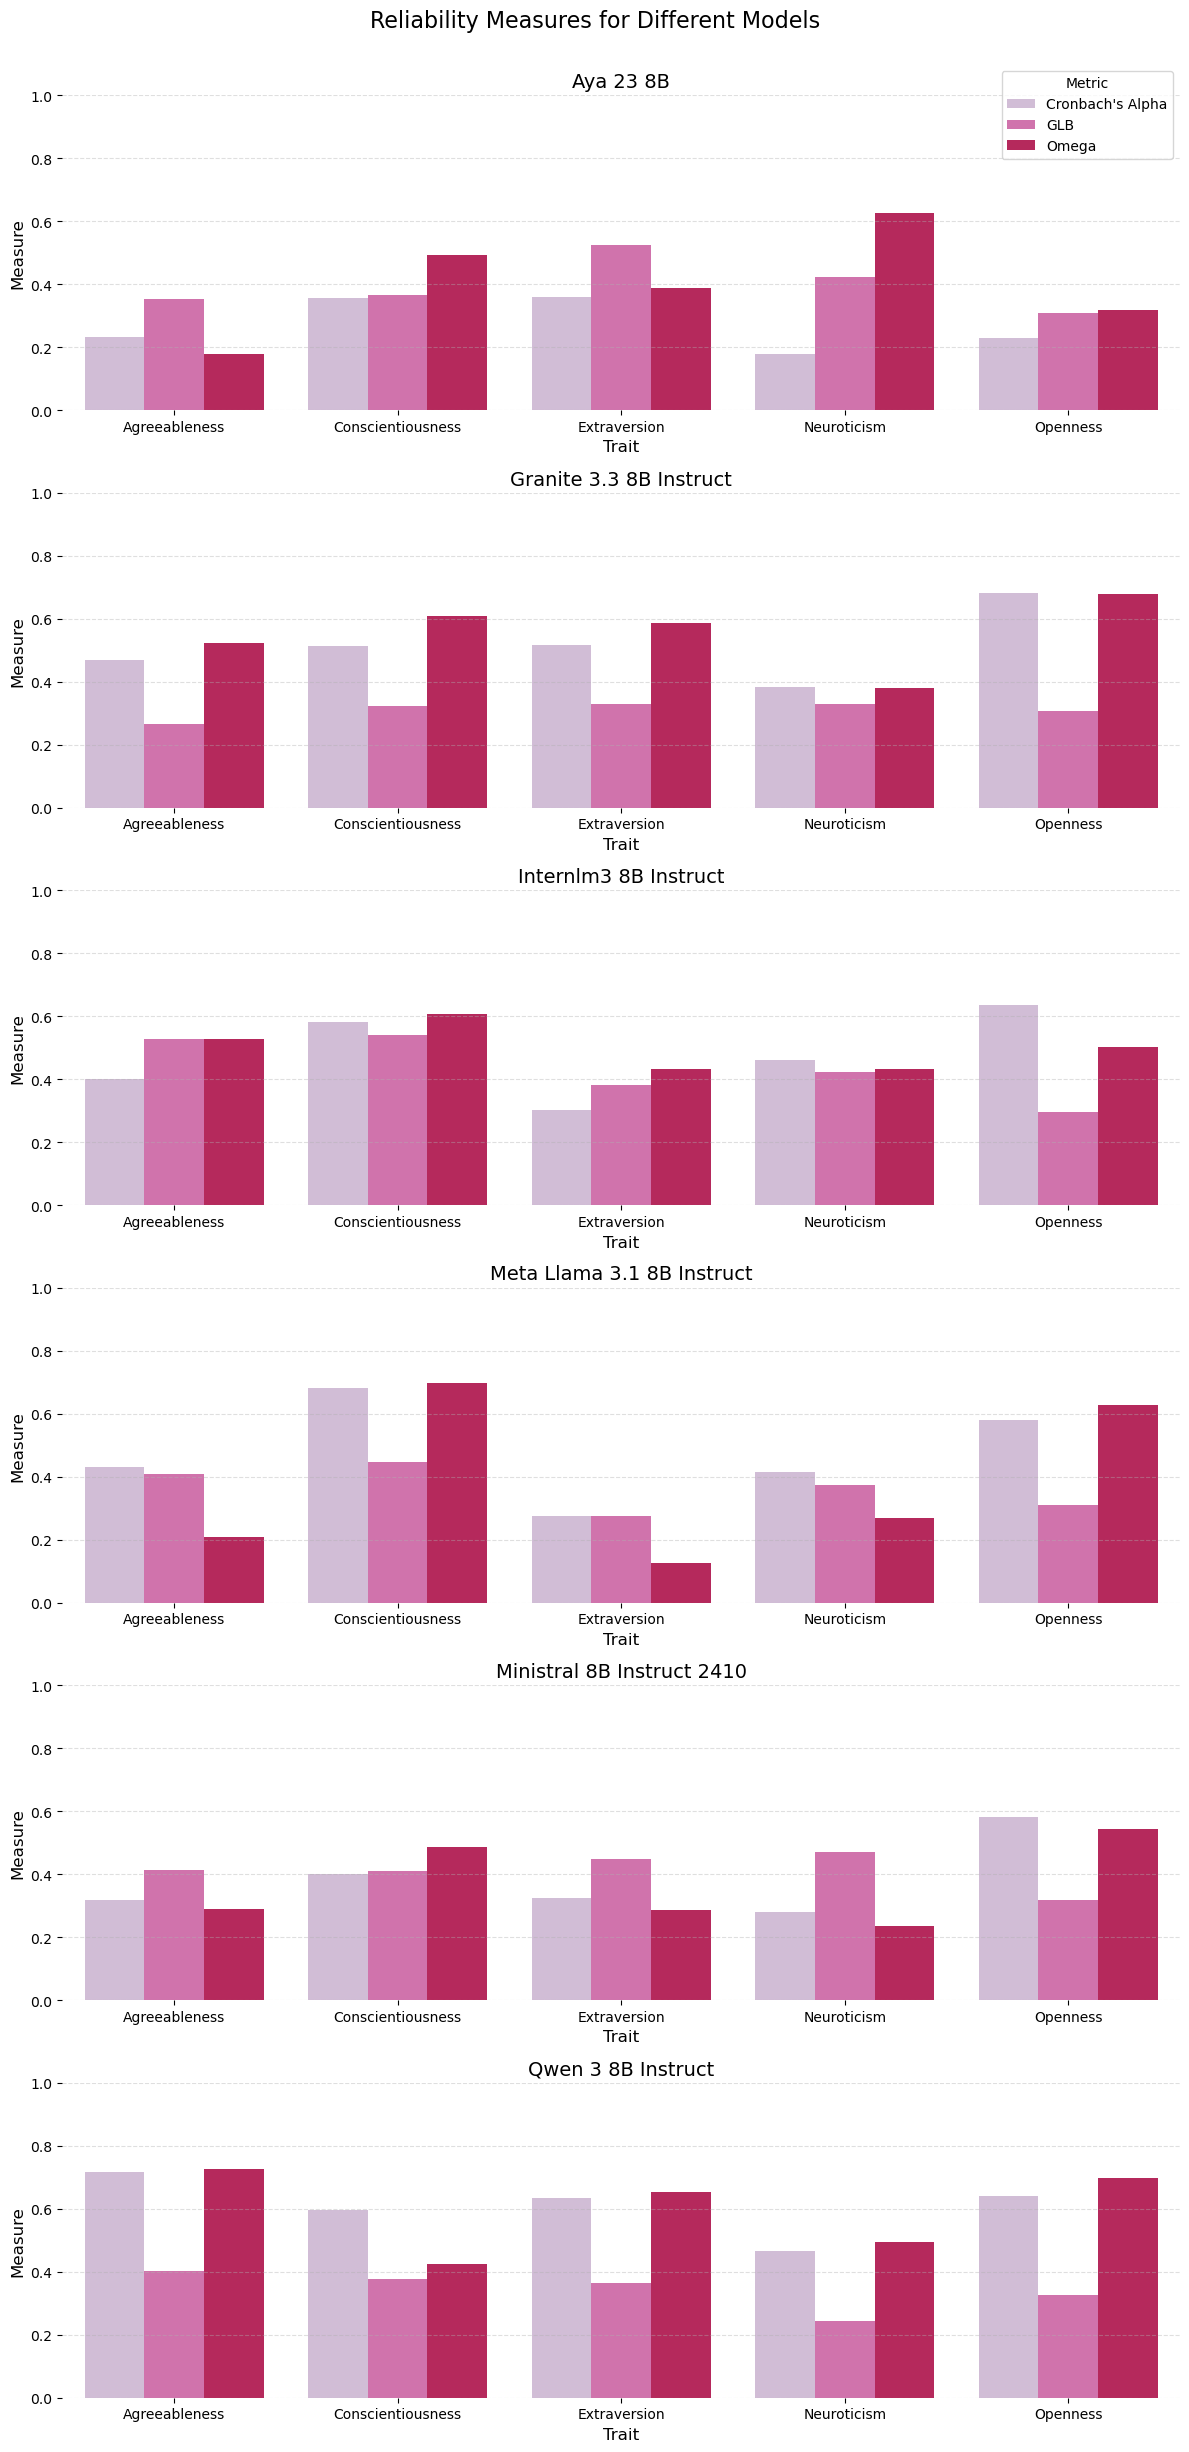

In [6]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(12, 24))

for i, model in enumerate(models):
    model_data = all_models[all_models["model"] == model]
    pallete = sns.color_palette("PuRd", n_colors=3)
    sns.barplot(data=model_data, x="trait", y="value", hue="metric", ax=ax[i], palette=pallete)
    ax[i].set_title(model.replace("-", " ").title(), fontsize=14)
    ax[i].set_ylim(0, 1)
    ax[i].set_ylabel("Measure", fontsize=12)
    ax[i].set_xlabel("Trait", fontsize=12)
    ax[i].grid(axis='x', visible=False)
    ax[i].grid(axis='y', visible=True, linestyle='--', alpha=0.4)
    for spine in ax[i].spines.values():
        spine.set_visible(False)

    if i == 0:
        ax[i].legend(title="Metric", loc='upper right', bbox_to_anchor=(1, 1.1))
    else:
        ax[i].legend().remove()

plt.tight_layout()
plt.suptitle("Reliability Measures for Different Models", fontsize=16, y=1.02)
plt.show()

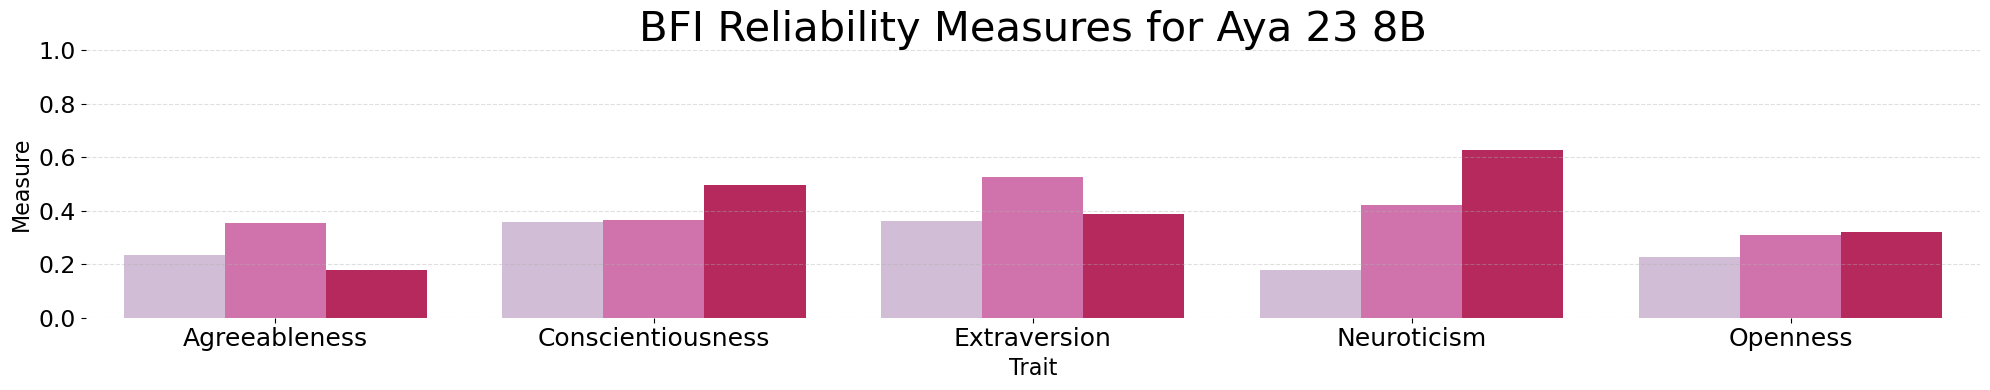

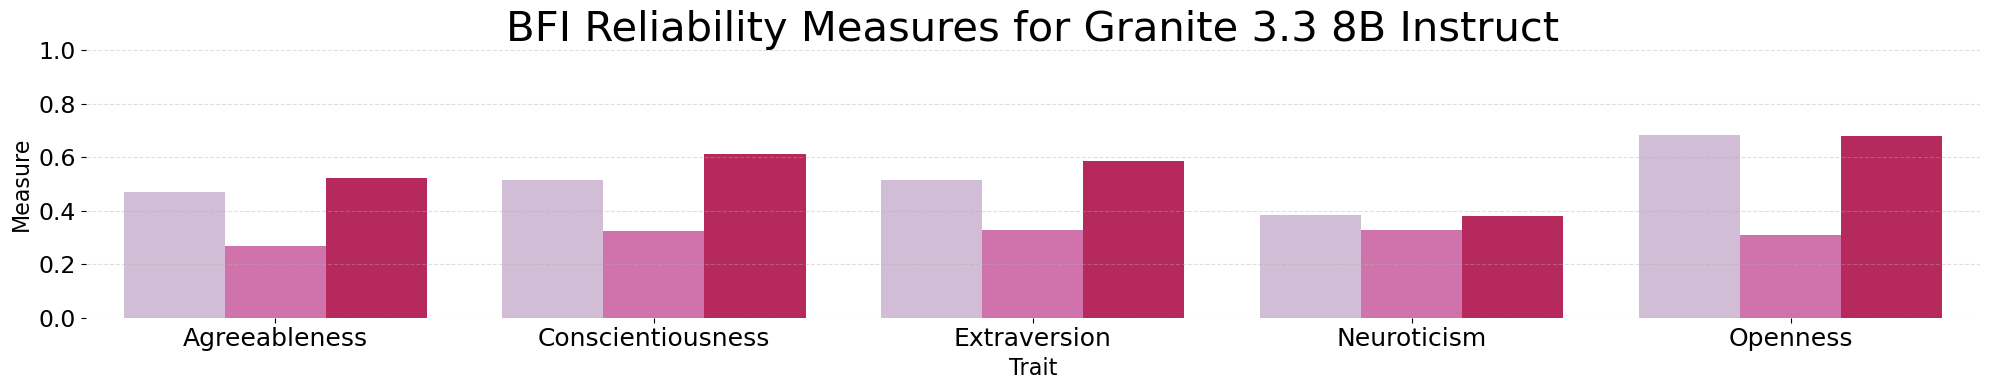

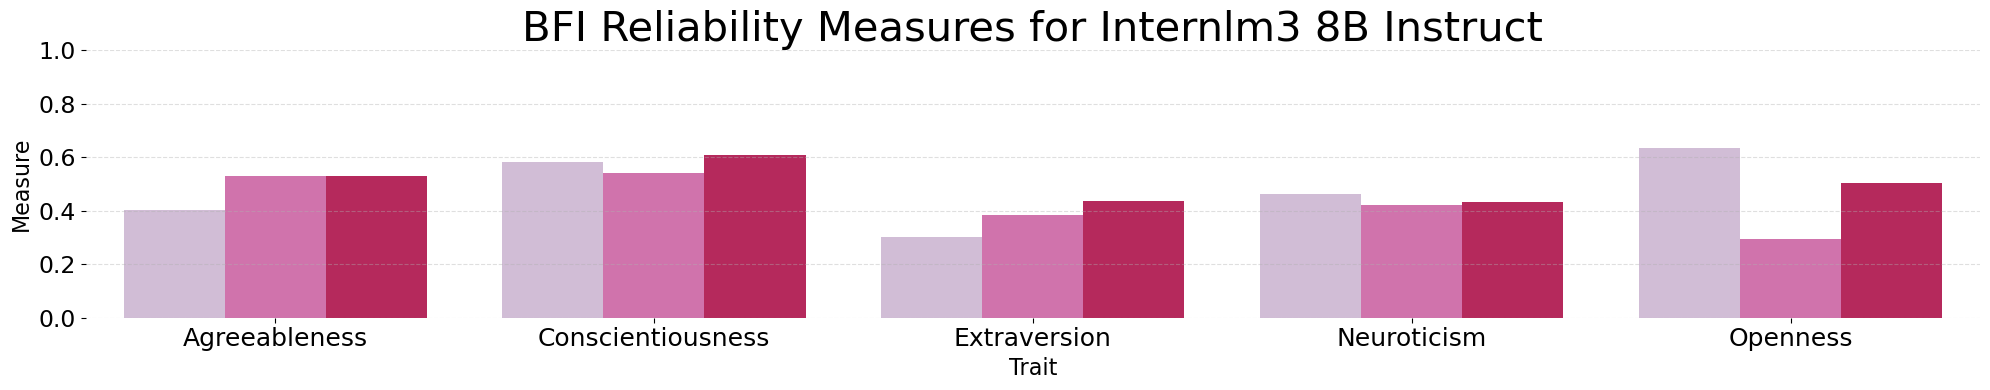

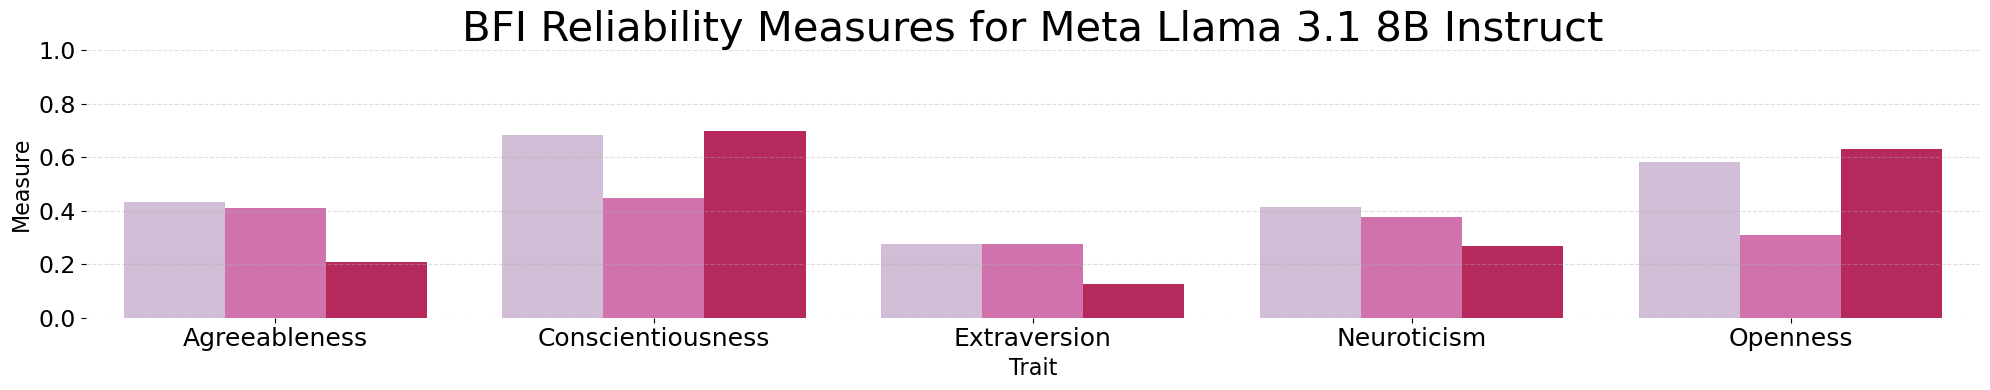

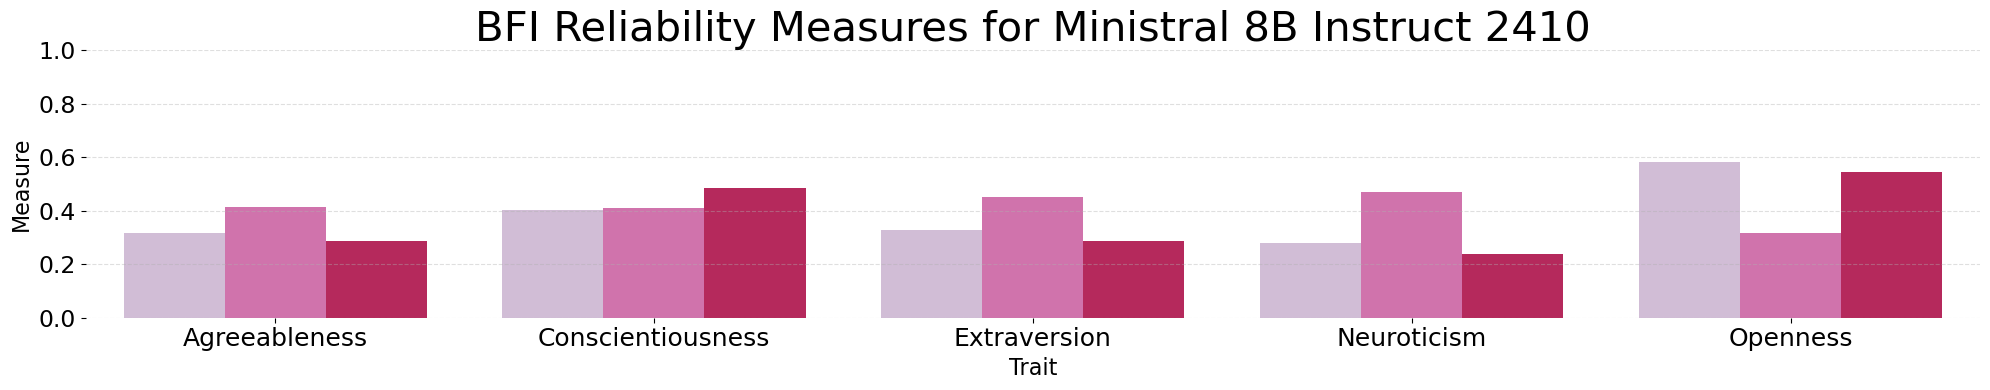

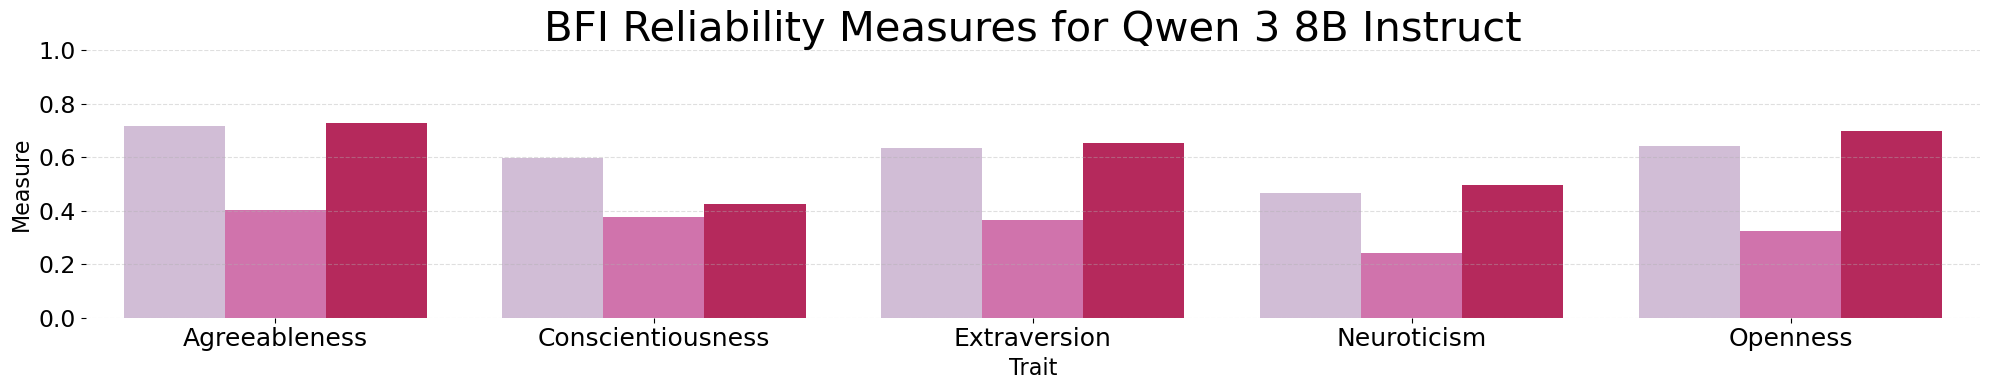

In [7]:
for i, model in enumerate(models):
    fig = plt.figure(figsize=(20, 4))
    
    model_data = all_models[all_models["model"] == model]
    pallete = sns.color_palette("PuRd", n_colors=3)
    sns.barplot(data=model_data, x="trait", y="value", hue="metric", palette=pallete)
    plt.title(f"BFI Reliability Measures for {model.replace('-', ' ').title()}", fontsize=30)
    plt.ylim((0, 1))
    plt.ylabel("Measure", fontsize=16)
    plt.xlabel("Trait", fontsize=16)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=17)
    plt.gca().legend().remove()
    # plt.legend(title="", loc='upper right', bbox_to_anchor=(1, 1.15), fontsize=16)
    
    
    plt.grid(axis='x', visible=False)
    plt.grid(axis='y', visible=True, linestyle='--', alpha=0.4)
    
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
        
    plt.tight_layout()
    
    plt.savefig(f"./plots/{model}/bfi_reliability.png")
    plt.show()

## Distribution

In [8]:
all_models_dist = pd.DataFrame(columns=["model", "trait", "1", "2", "3", "4", "5"])

for model in models:
    df = pd.read_json(f"./persona_results/{model}/results/distribution.json")
    bfi_distribution = df["BFI"]
    bfi_distribution = bfi_distribution.reset_index()
    bfi_distribution = bfi_distribution[bfi_distribution["BFI"].isna() == False]
    bfi_distribution = pd.concat((bfi_distribution, bfi_distribution["BFI"].apply(pd.Series)), axis=1)
    bfi_distribution = bfi_distribution.drop(columns=["BFI"])
    bfi_distribution.columns = ["trait", "1", "2", "3", "4", "5"]
    bfi_distribution["model"] = model
    
    all_models_dist = pd.concat((all_models_dist, bfi_distribution), ignore_index=True)

In [9]:
df

,BFI,PANAS,BPAQ,SSCS
Extraversion,"{'1': 3.28, '2': 25.56, '3': 24.7, '4': 43.33,...",NaN,NaN,NaN
Agreeableness,"{'1': 0.15, '2': 6.64, '3': 6.13, '4': 36.37, ...",NaN,NaN,NaN
Conscientiousness,"{'1': 0.04, '2': 0.53, '3': 10.84, '4': 29.32,...",NaN,NaN,NaN
Neuroticism,"{'1': 30.15, '2': 31.55, '3': 22.03, '4': 15.9...",NaN,NaN,NaN
Openness,"{'1': 8.13, '2': 16.89, '3': 12.65, '4': 41.18...",NaN,NaN,NaN
Positive,NaN,"{'1': 0.01, '2': 2.01, '3': 0.66, '4': 26.84, ...",NaN,NaN
Negative,NaN,"{'1': 23.97, '2': 52.78, '3': 20.77, '4': 2.35...",NaN,NaN
Physical,NaN,NaN,"{'1': 21.06, '2': 33.35, '3': 20.43, '4': 22.5...",NaN
Verbal,NaN,NaN,"{'1': 0.0, '2': 12.29, '3': 12.81, '4': 64.42,...",NaN
Anger,NaN,NaN,"{'1': 11.98, '2': 19.01, '3': 27.23, '4': 34.2...",NaN


In [10]:
all_models_dist = all_models_dist.melt(id_vars=["model", "trait"], value_vars=["1", "2", "3", "4", "5"], var_name="answer", value_name="distribution")
all_models_dist

,model,trait,answer,distribution
0,aya-23-8b,Extraversion,1,3.97
1,aya-23-8b,Agreeableness,1,0.28
2,aya-23-8b,Conscientiousness,1,0.72
3,aya-23-8b,Neuroticism,1,22.91
4,aya-23-8b,Openness,1,2.31
...,...,...,...,...
145,qwen-3-8b-instruct,Extraversion,5,3.13
146,qwen-3-8b-instruct,Agreeableness,5,50.71
147,qwen-3-8b-instruct,Conscientiousness,5,59.27
148,qwen-3-8b-instruct,Neuroticism,5,0.34


In [11]:
all_models_dist["distribution"] /= 100
all_models_dist

,model,trait,answer,distribution
0,aya-23-8b,Extraversion,1,0.0397
1,aya-23-8b,Agreeableness,1,0.0028
2,aya-23-8b,Conscientiousness,1,0.0072
3,aya-23-8b,Neuroticism,1,0.2291
4,aya-23-8b,Openness,1,0.0231
...,...,...,...,...
145,qwen-3-8b-instruct,Extraversion,5,0.0313
146,qwen-3-8b-instruct,Agreeableness,5,0.5071
147,qwen-3-8b-instruct,Conscientiousness,5,0.5927
148,qwen-3-8b-instruct,Neuroticism,5,0.0034


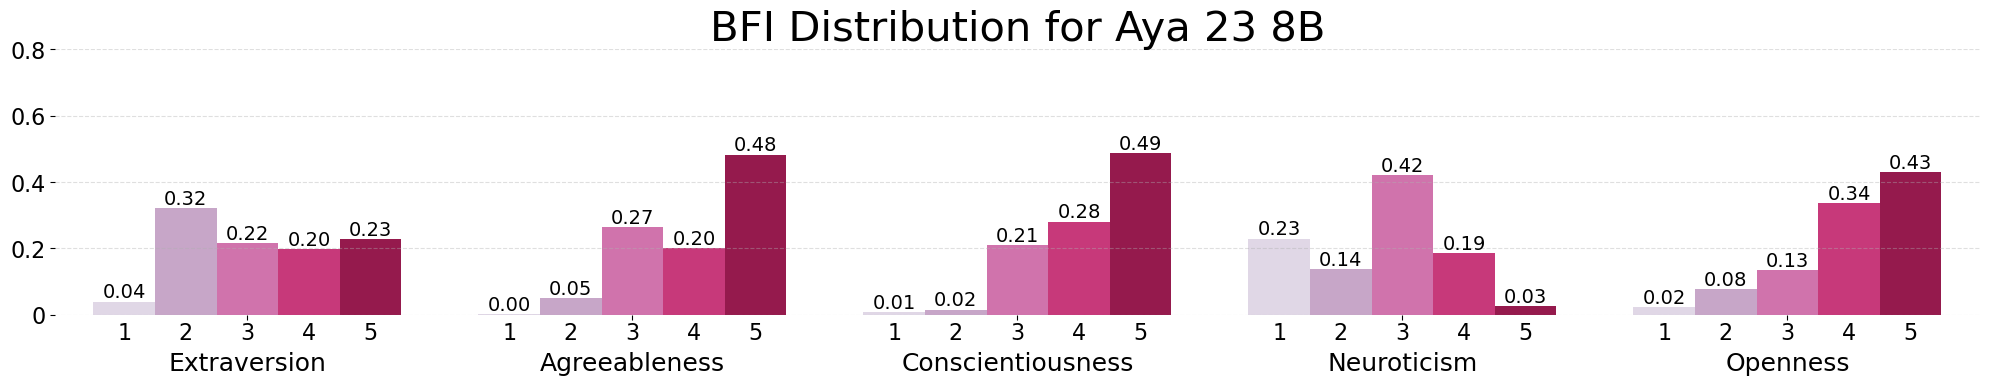

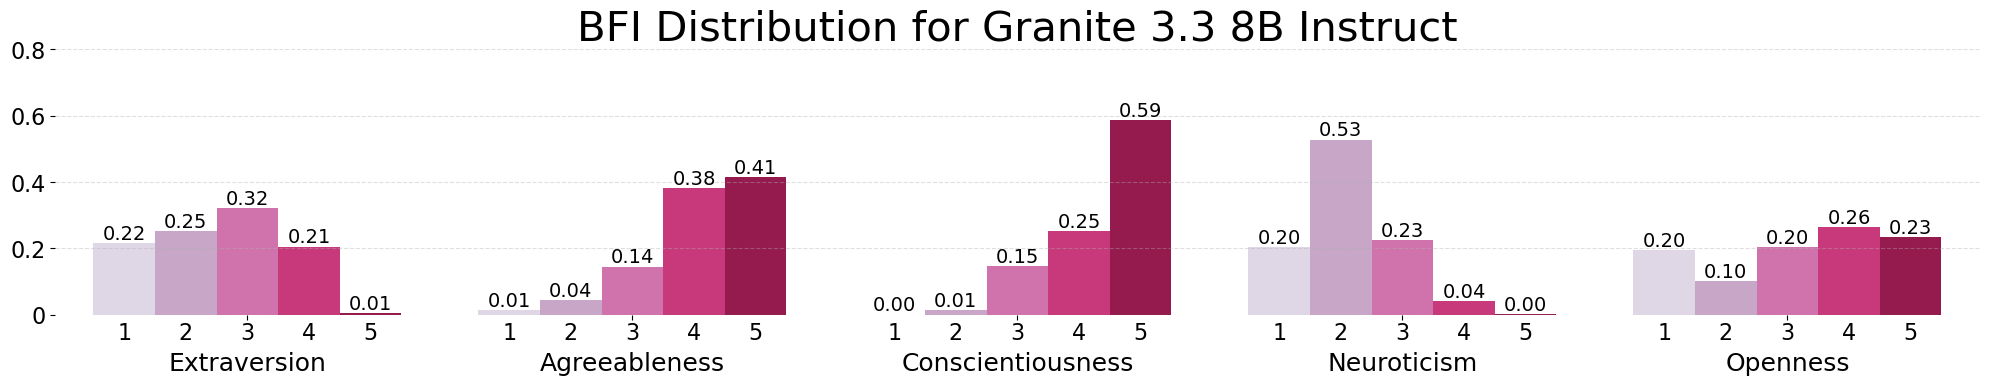

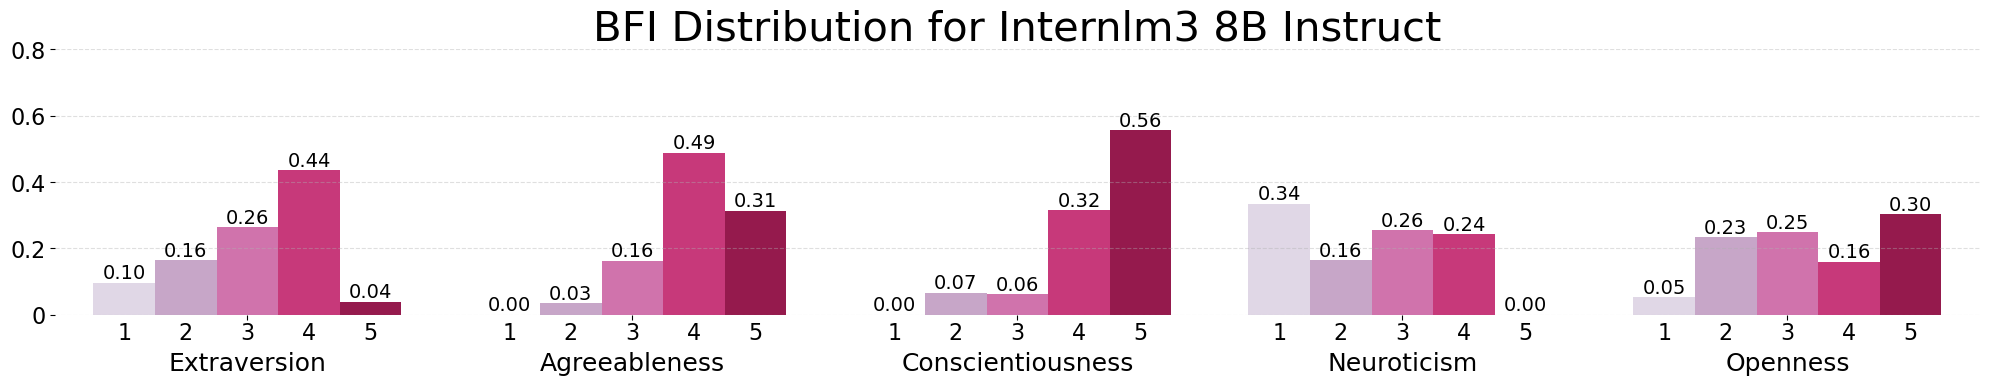

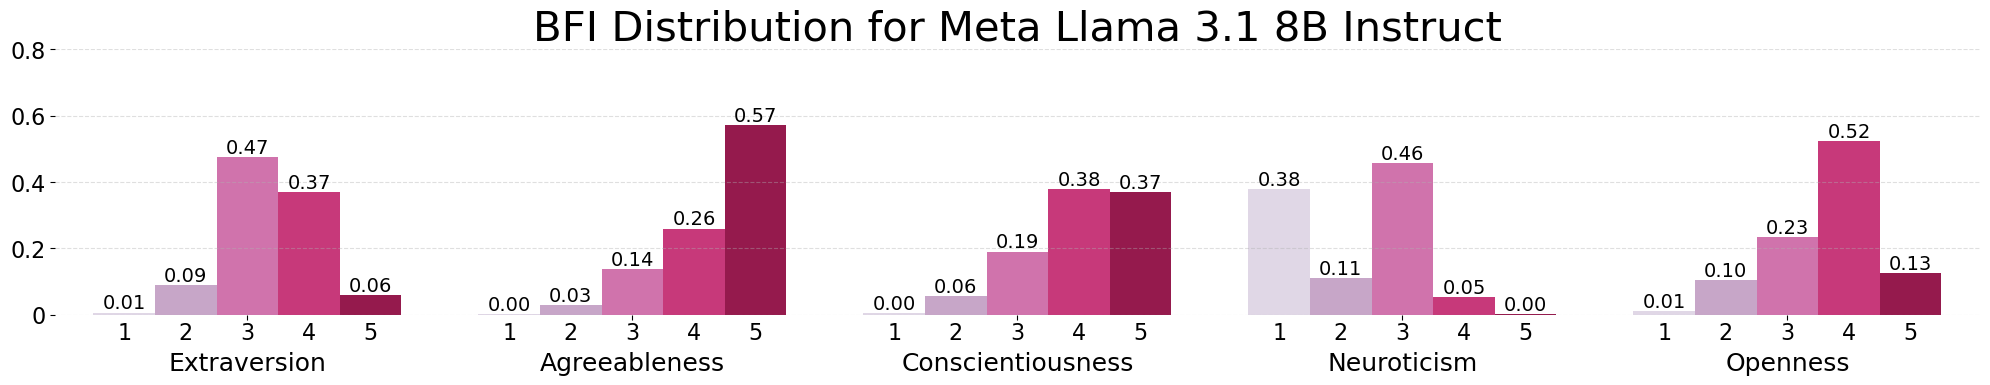

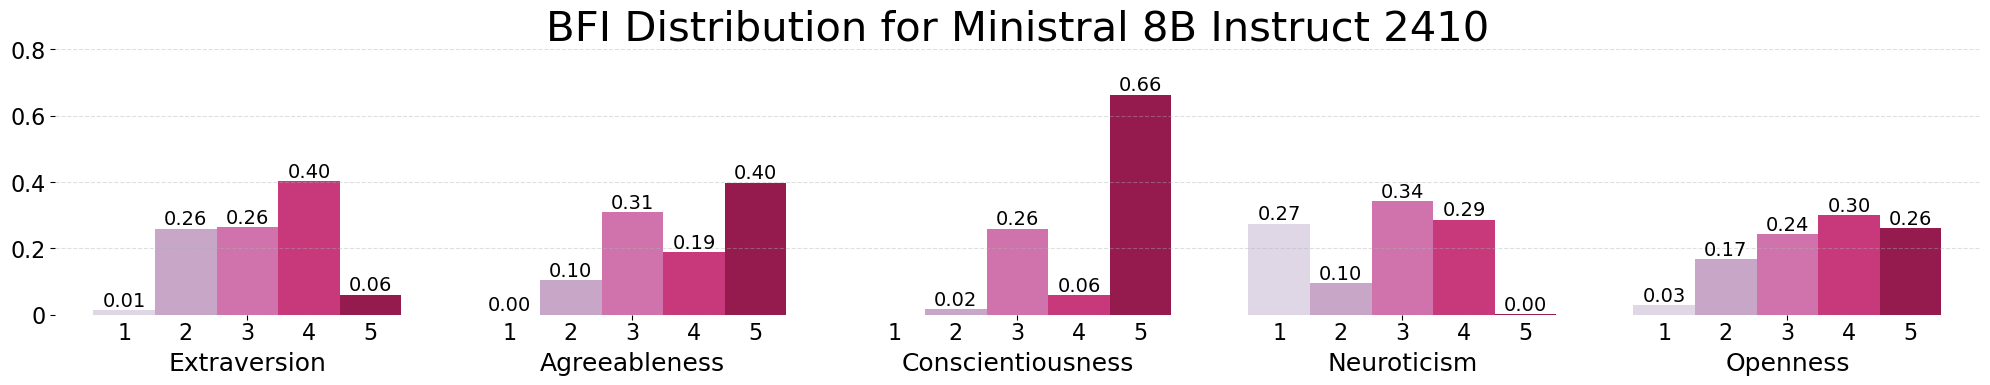

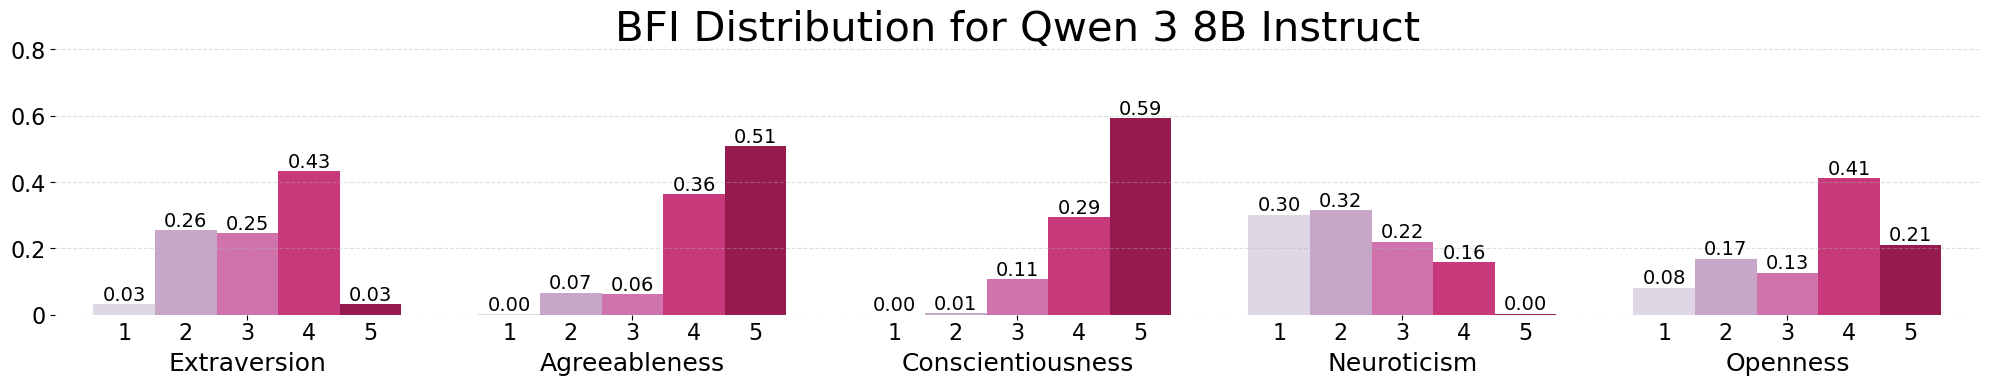

In [12]:
for model in models:
    fig = plt.figure(figsize=(20, 4))

    model_data = all_models_dist[all_models_dist["model"] == model]
    pallete = sns.color_palette("PuRd", n_colors=5)
    ax = sns.barplot(
        data=model_data, x="trait", y="distribution", hue="answer", palette=pallete
    )
    plt.title(f"BFI Distribution for {model.replace('-', ' ').title()}", fontsize=30)
    plt.ylabel("")
    plt.xlabel("")
    plt.xticks(fontsize=18, y=-0.1)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8], [0, 0.2, 0.4, 0.6, 0.8], fontsize=16)
    plt.ylim((0, 0.8))
    plt.grid(axis="x", visible=False)
    plt.grid(axis="y", visible=True, linestyle="--", alpha=0.4)

    ax.legend_.remove()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            x = bar.get_x() / 2 + bar.get_width() / 2
            hue_label = ["1", "2", "3", "4", "5"]

    for bar, (_, row) in zip(ax.patches, model_data.iterrows()):
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        ax.text(x, -0.09, row["answer"], ha="center", va="bottom", fontsize=16)

    for i, bar in enumerate(ax.patches):
        if bar.get_height() > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{bar.get_height():.2f}",
                ha="center",
                va="bottom",
                fontsize=14,
            )

    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    plt.savefig(f"./plots/{model}/bfi_distribution.png")
    plt.show()

## Heatmap

In [13]:
all_models_corr = pd.DataFrame(columns=["model", "trait", "Extraversion", "Agreeableness", "Conscientiousness", "Neuroticism", "Openness"])

for model in models:
    df = pd.read_json(f"./persona_results/{model}/results/subscale_correlations.json")
    bfi_corr = df["BFI"]
    bfi_corr = bfi_corr.reset_index()
    bfi_corr = bfi_corr[bfi_corr["BFI"].isna() == False]
    bfi_corr = pd.concat((bfi_corr, bfi_corr["BFI"].apply(pd.Series)), axis=1)
    bfi_corr = bfi_corr.drop(columns=["BFI"])
    bfi_corr.columns = ["trait", "Extraversion", "Agreeableness", "Conscientiousness", "Neuroticism", "Openness"]
    bfi_corr["model"] = model
    
    all_models_corr = pd.concat((all_models_corr, bfi_corr), ignore_index=True)
    
all_models_corr = all_models_corr[["model", "trait", "Agreeableness", "Conscientiousness", "Extraversion", "Neuroticism", "Openness"]]

In [14]:
all_models_corr

,model,trait,Agreeableness,Conscientiousness,Extraversion,Neuroticism,Openness
0,aya-23-8b,Extraversion,0.1582,0.1415,1.0000,-0.0690,0.2907
1,aya-23-8b,Agreeableness,1.0000,-0.1048,0.1582,-0.0445,0.1630
2,aya-23-8b,Conscientiousness,-0.1048,1.0000,0.1415,-0.3916,0.0078
3,aya-23-8b,Neuroticism,-0.0445,-0.3916,-0.0690,1.0000,0.1418
4,aya-23-8b,Openness,0.1630,0.0078,0.2907,0.1418,1.0000
5,granite-3.3-8b-instruct,Extraversion,0.3195,0.2096,1.0000,-0.1478,0.2931
6,granite-3.3-8b-instruct,Agreeableness,1.0000,0.3923,0.3195,-0.3283,-0.1863
7,granite-3.3-8b-instruct,Conscientiousness,0.3923,1.0000,0.2096,-0.4271,-0.3032
8,granite-3.3-8b-instruct,Neuroticism,-0.3283,-0.4271,-0.1478,1.0000,0.1403
9,granite-3.3-8b-instruct,Openness,-0.1863,-0.3032,0.2931,0.1403,1.0000


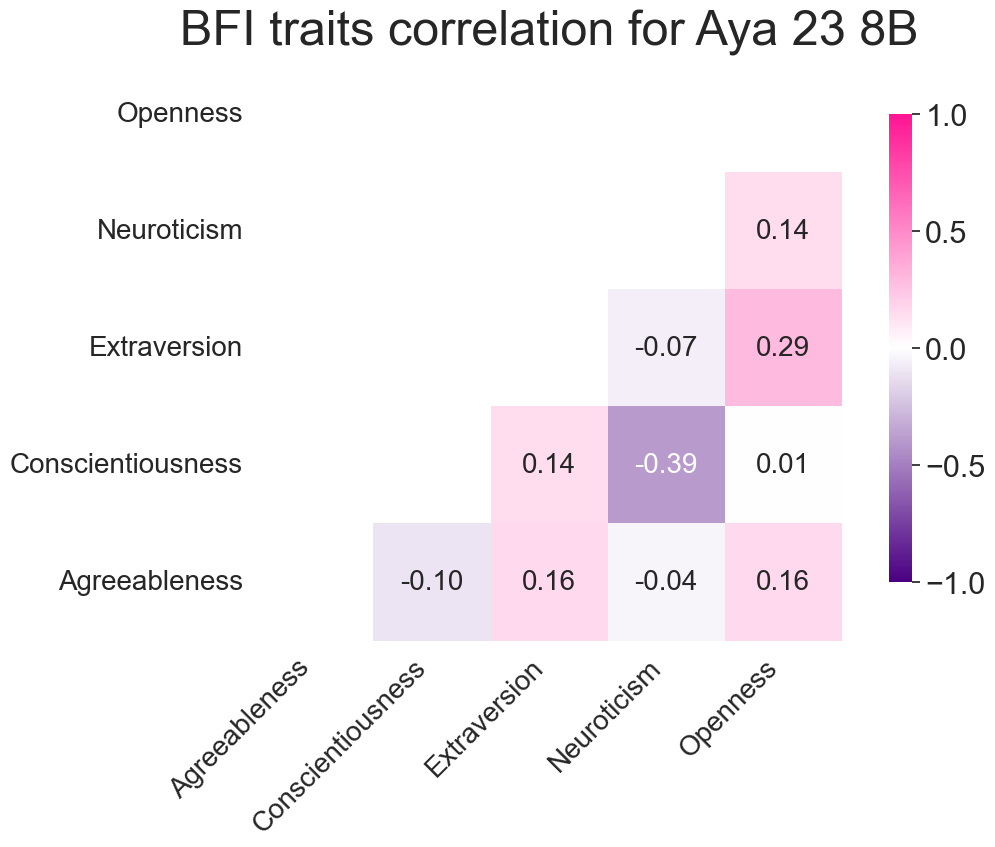

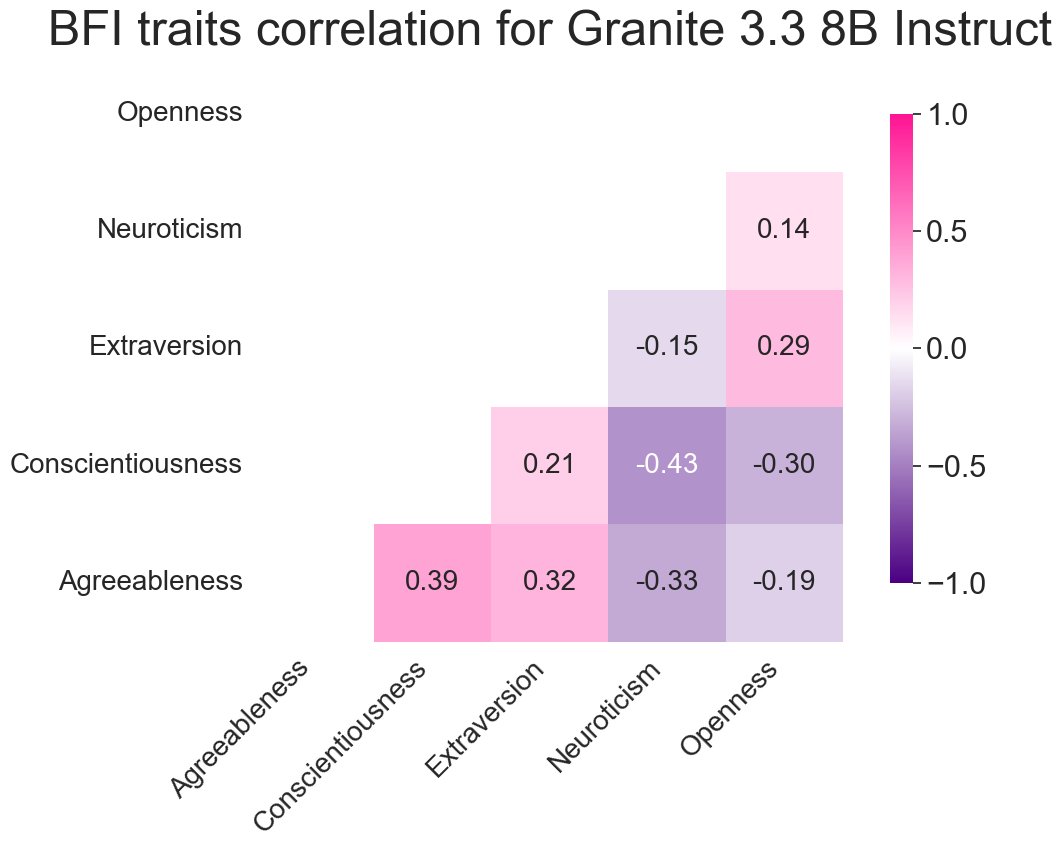

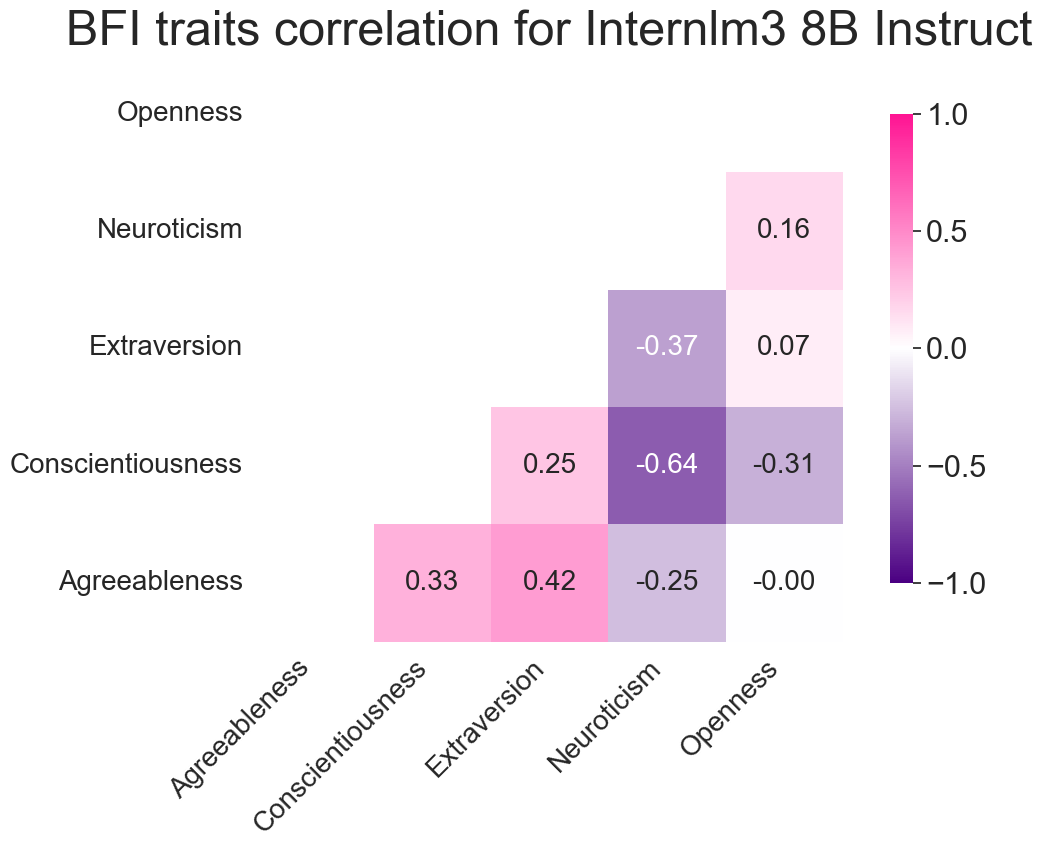

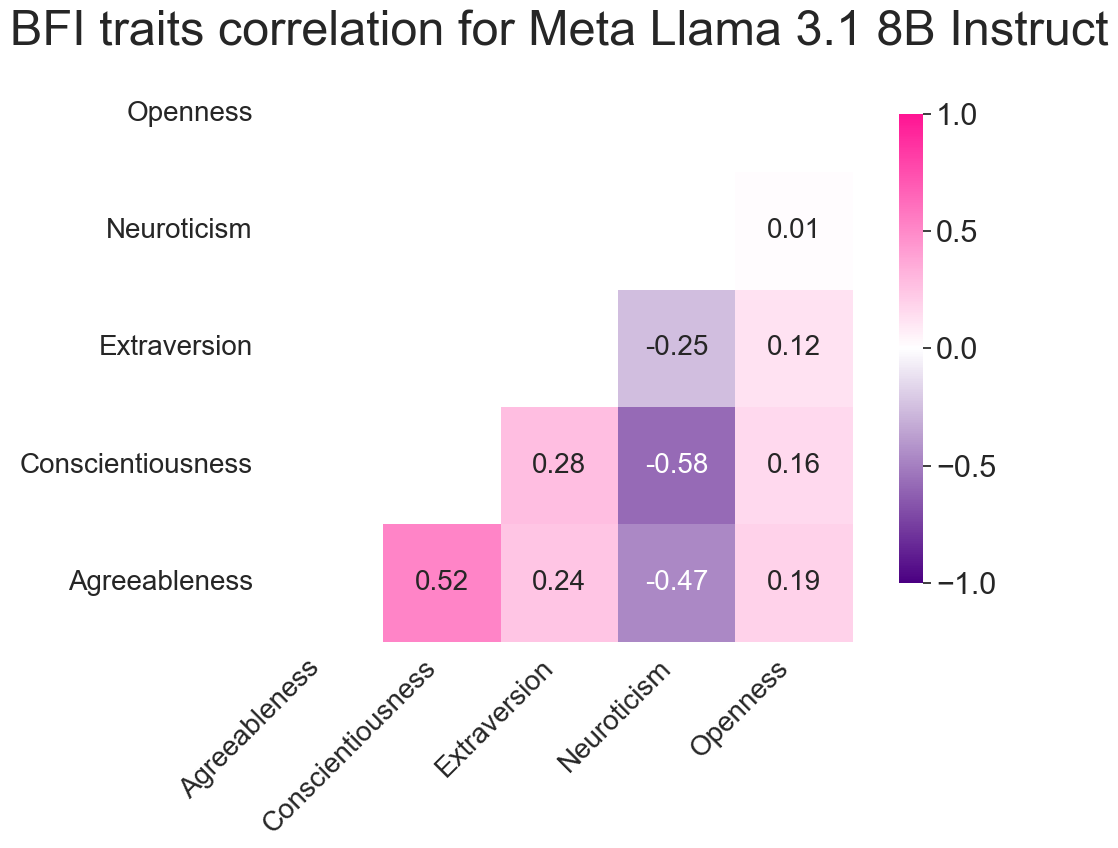

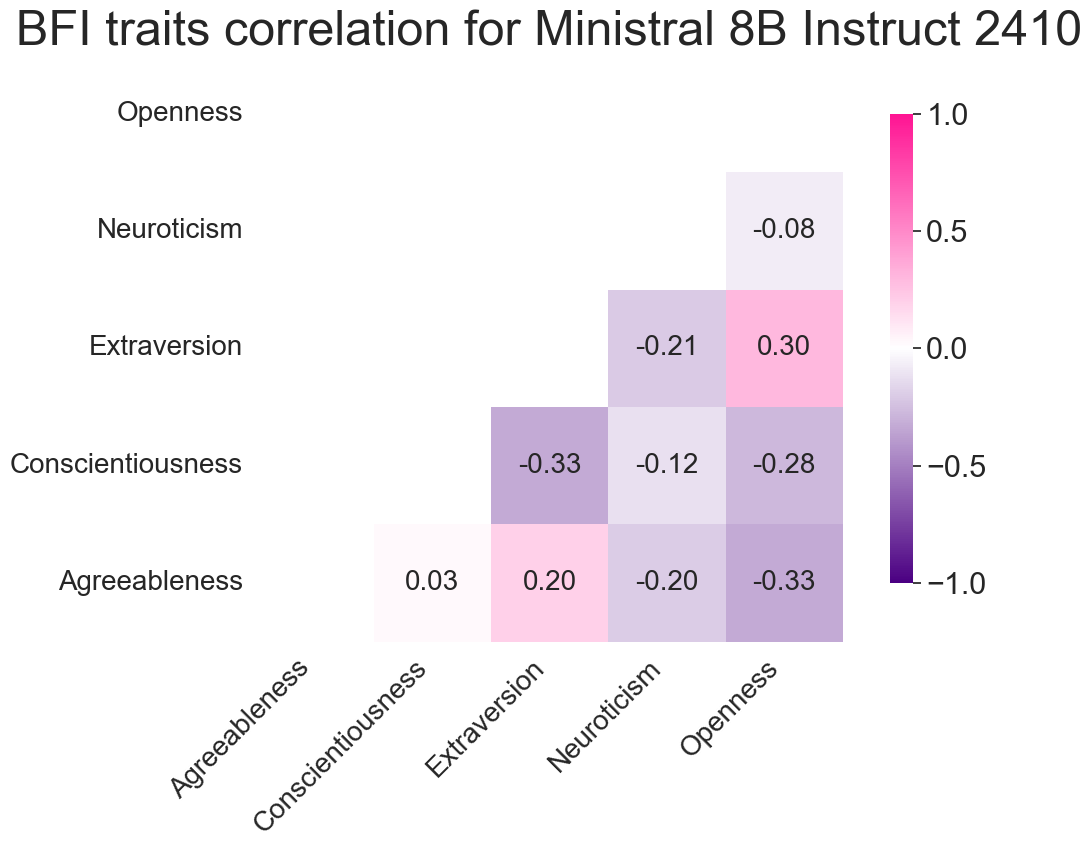

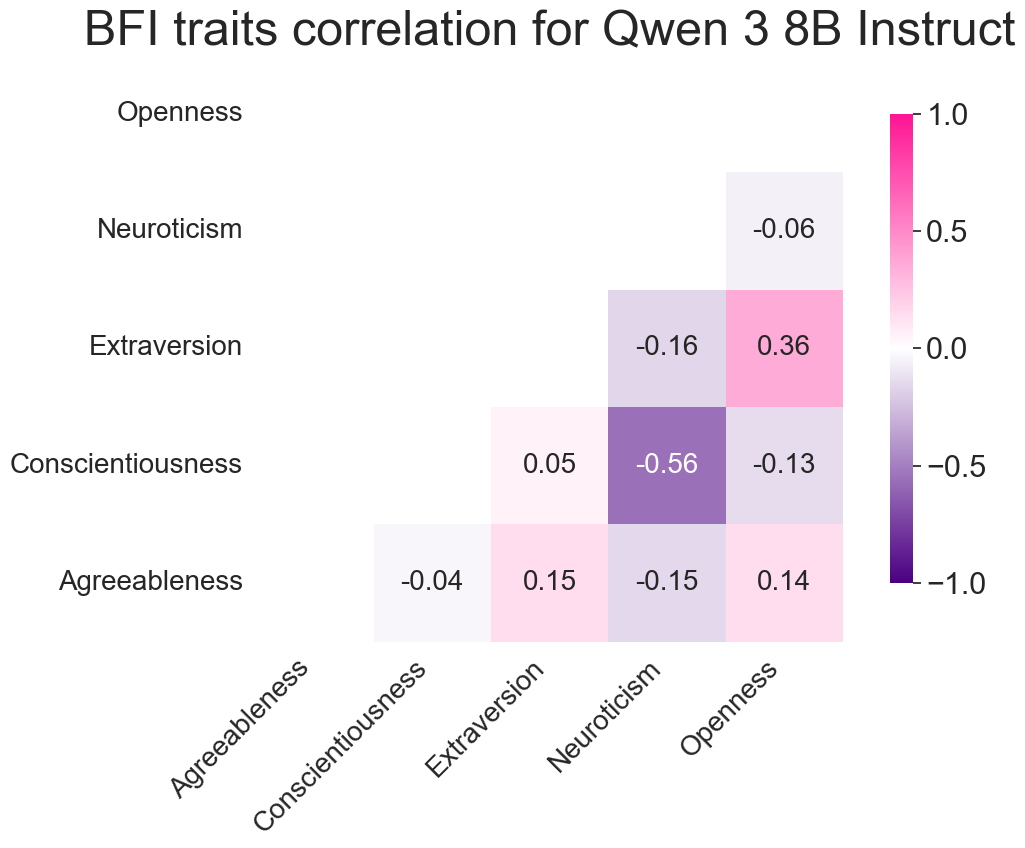

In [15]:
for i, model in enumerate(models):
    df = all_models_corr[all_models_corr["model"] == model]

    custom_cmap = LinearSegmentedColormap.from_list(
        "purple-white-pink", ["#4B0082", "#FFFFFF", "#FF1493"], N=256
    )
    df.drop(columns=["model"], axis=1, inplace=True)
    df = df.sort_values(by="trait", ascending=False)
    df = df.reindex(columns=df.columns[::-1])
    df = df.set_index("trait")
    mask = np.triu(np.ones_like(df, dtype=bool), k=0)
    sns.set(font_scale=2)
    plt.figure(figsize=(12, 9))
    ax = sns.heatmap(
        df,
        mask=mask,
        annot=True,
        fmt=".2f",
        cmap=custom_cmap,
        square=True,
        cbar=True,
        cbar_kws={"shrink": 0.8, "ticks":[-1, -0.5, 0, 0.5, 1], },
        vmin=-1,
        vmax=1,
        annot_kws={"size": 20},
        linewidths=0,
        linecolor="white",
    )
    plt.gca().invert_xaxis()
    plt.title(f"BFI traits correlation for {model.replace('-', ' ').title()}", fontsize=35)
    plt.ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=45, ha="right")
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=20, rotation=0)
    ax.set_facecolor("white")
    ax.figure.set_facecolor("white")

    plt.grid(False)

    plt.tight_layout()
    plt.savefig(f"./plots/{model}/bfi_corr.png")
    plt.show()